<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [3]:
import misleep
import yasa
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.2)

In [12]:
?misleep.plot_signals

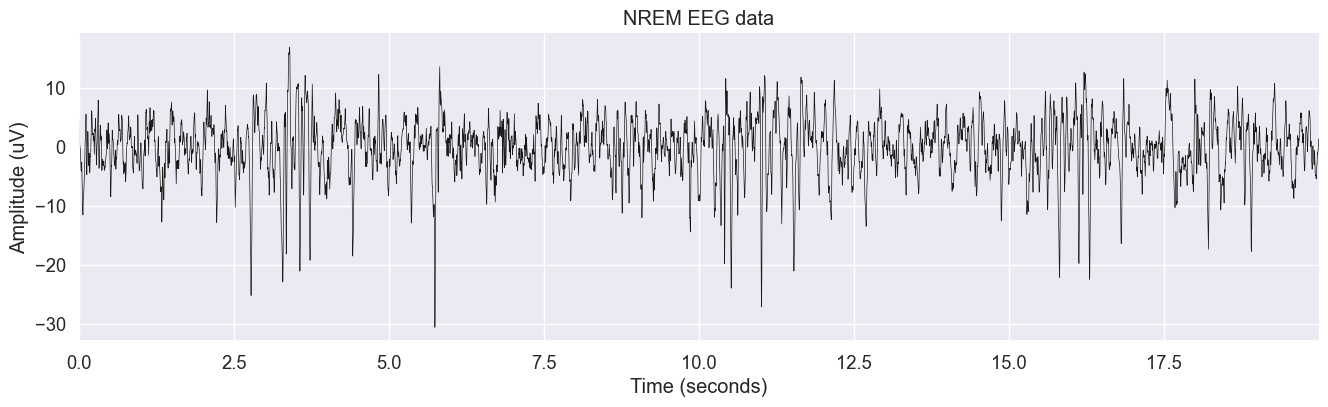

In [27]:
data = misleep.load_mat(
    r"E:\workplace\EEGProcessing\00_DATA\20240114_17_0700_7pin\female1\female1.mat")
label = misleep.load_misleep_anno(r"E:\workplace\EEGProcessing\00_DATA\20240114_17_0700_7pin\female1\female1_label.txt")

data = data.signals[1][int(5818*305):int(5838*305)]*100
label = label.sleep_state[5818:5838]*305

# Define sampling frequency and time vector
sf = 305.
times = np.arange(data.size) / sf

# Plot the signal
fig, ax = plt.subplots(1, 1, figsize=(16, 4))
plt.plot(times, data, lw=0.5, color='k')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude (uV)')
plt.xlim([times.min(), times.max()])
plt.title('NREM EEG data')
sns.despine()

In [15]:
?yasa.spindles_detect

In [28]:
# Apply the detection using yasa.spindles_detect
sp = yasa.spindles_detect(data, sf, freq_sp=(10, 15), duration=(0.5, 4))

# Display the results using .summary()
sp.summary()

,Start,Peak,End,Duration,Amplitude,RMS,AbsPower,RelPower,Frequency,Oscillations,Symmetry,Channel,IdxChannel
0,2.665574,3.022951,3.544262,0.878689,38.808591,7.612515,1.488311,0.318964,12.176477,10.0,0.405204,CHAN000,0
1,10.498361,11.062295,11.809836,1.311475,38.657777,6.812593,1.406781,0.366588,11.688235,13.0,0.428928,CHAN000,0
2,15.527869,16.213115,16.954098,1.426230,33.347531,6.228131,1.456356,0.348342,11.882091,17.0,0.479358,CHAN000,0


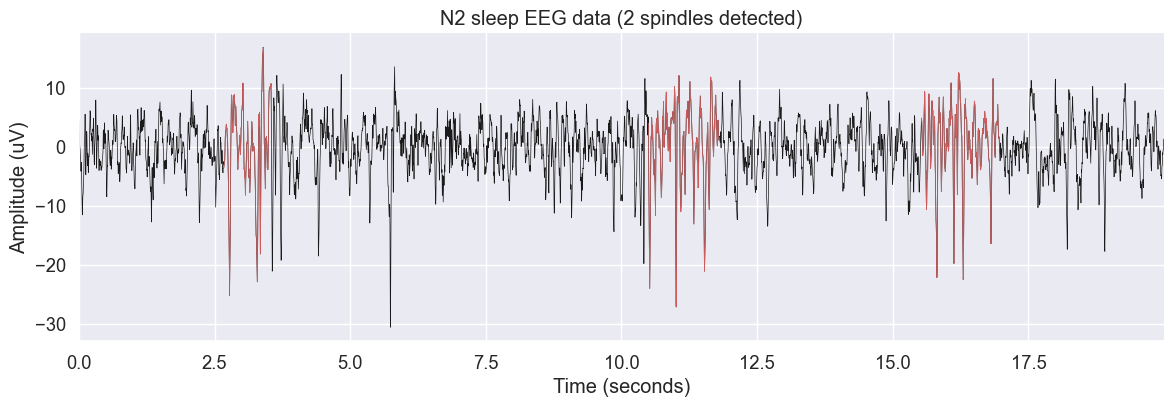

In [29]:
# Let's get a bool vector indicating for each sample
mask = sp.get_mask()
# Now let's plot
spindles_highlight = data * mask
spindles_highlight[spindles_highlight == 0] = np.nan

plt.figure(figsize=(14, 4))
plt.plot(times, data, lw=0.5, color='k')
plt.plot(times, spindles_highlight, lw=0.5, color='indianred')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude (uV)')
plt.xlim([0, times[-1]])
plt.title('N2 sleep EEG data (2 spindles detected)')
sns.despine()
# plt.savefig('detection.png', dpi=300, bbox_inches='tight')

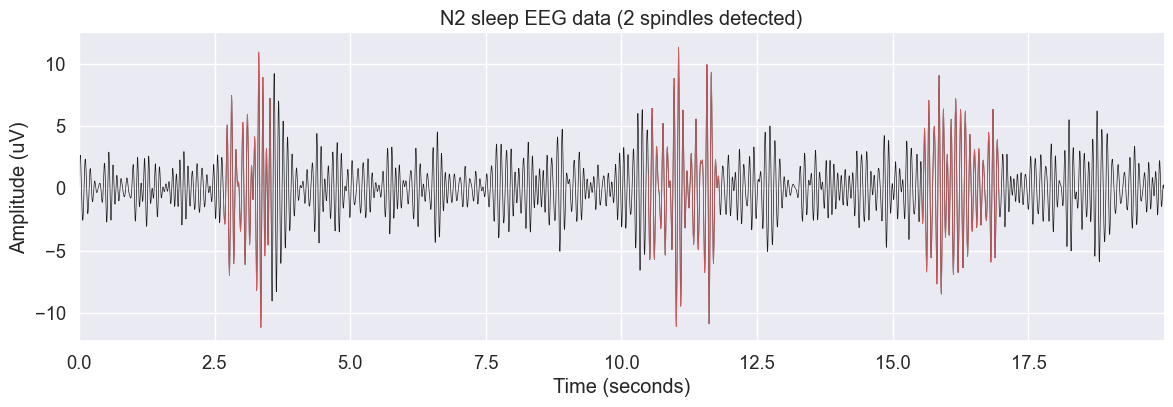

In [52]:
data_filt = np.squeeze(sp._data_filt)
sp_highlight = data_filt * mask
sp_highlight[sp_highlight == 0] = np.nan

plt.figure(figsize=(14, 4))
plt.plot(times, data_filt, lw=0.5, color='k')
plt.plot(times, sp_highlight, lw=0.5, color='indianred')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude (uV)')
plt.xlim([0, times[-1]])
plt.title('N2 sleep EEG data (2 spindles detected)')
sns.despine()

In [49]:
data_filt, _ = misleep.signal_filter(data, sf=305, btype='bandpass', low=10, high=15)
data_filt

array([-0.41436238, -0.16513929,  0.10617316, ...,  0.24368261,
        0.25902369,  0.25161296])

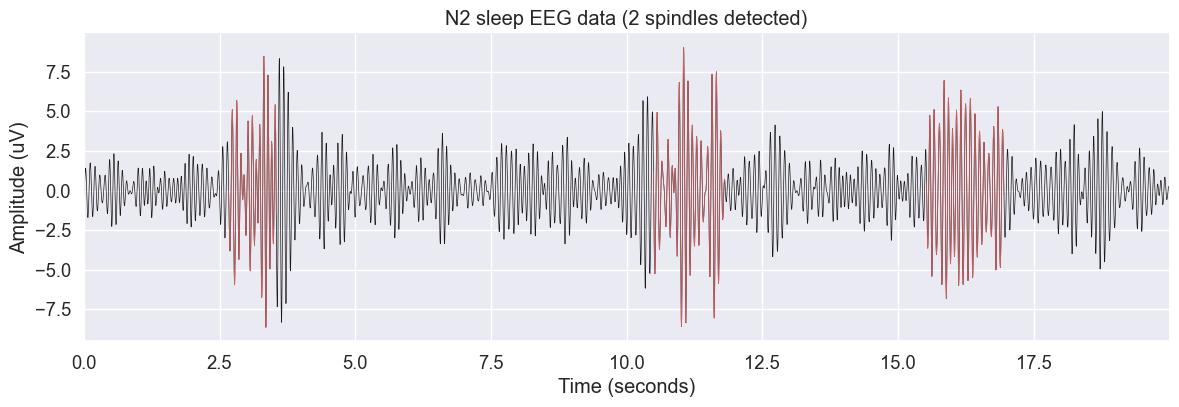

In [53]:
data_filt, _ = misleep.signal_filter(data, sf=305, btype='bandpass', low=10, high=15)

sp_highlight = data_filt * mask
sp_highlight[sp_highlight == 0] = np.nan

plt.figure(figsize=(14, 4))
plt.plot(times, data_filt, lw=0.5, color='k')
plt.plot(times, sp_highlight, lw=0.5, color='indianred')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude (uV)')
plt.xlim([0, times[-1]])
plt.title('N2 sleep EEG data (2 spindles detected)')
sns.despine()